<a href="https://colab.research.google.com/github/HazenDeveloper/Attn-CNN-Model/blob/main/CNN_FE_SVM_RF-LungsCancer-00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#!pip install imutils
import keras
import tensorflow as tf

import os
from keras.layers import Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import Input
from keras.layers import BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
from keras.models import Model
from sklearn.utils import shuffle
from cv2 import imread
import numpy as np
import pandas as pd


In [ ]:
from os import listdir, walk
from os.path import isfile, join
import cv2
from google.colab.patches import cv2_imshow


path = os.path.join(os.path.curdir,'/content/drive/MyDrive/ML-Datasets/LungsCancer')
print(path)

# print('testing', imagePaths[1].split(os.path.sep)[-2])

# img = cv2.imread(imagePaths[2])
# cv2_imshow(img)



/content/drive/MyDrive/ML-Datasets/Messidore


In [3]:
data = []
labels = []
width,height=256,256
depth = 3
input_shape = (height, width, depth)

classes = 4

imagePaths = list(paths.list_images('/content/drive/MyDrive/ML-Datasets/LungsCancer'))

train_data_dir = '/content/drive/MyDrive/ML-Datasets/LungsCancer/Normal'
test_data_dir = '/content/drive/MyDrive/ML-Datasets/LungsCancer/Bengin'
valid_data_dir = '/content/drive/MyDrive/ML-Datasets/LungsCancer/Malignant'

data = []
labels = []

for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    image = load_img(imagePath, target_size=(width, height))
    image = img_to_array(image)
    data.append(image)
    labels.append(label)

data = np.array(data, dtype="float32")
labels = np.array(labels)
print(len(data), len(labels))

from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# le = LabelEncoder()
# labels = le.fit_transform(labels)

# ohe = OneHotEncoder()
# labels = ohe.fit_transform(labels)

lb = LabelBinarizer()
labels = lb.fit_transform(labels)

#labels = to_categorical(labels)

data, labels = shuffle(data, labels)

print(data.shape)
print(labels.shape)

1097 1097
(1097, 256, 256, 3)
(1097, 3)


In [4]:
test_ratio = 0.2
# train is now 75% of the entire data set
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=test_ratio)

print("Train images:",x_train.shape)
print("Test images:",x_test.shape)
print("Train label:",y_train.shape)
print("Test label:",y_test.shape)

Train images: (877, 256, 256, 3)
Test images: (220, 256, 256, 3)
Train label: (877, 3)
Test label: (220, 3)


In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train,test_size=test_ratio)

In [ ]:
print("Train images:",x_train.shape)
print("Test images:",x_valid.shape)
print("Train label:",y_train.shape)
print("Test label:",y_valid.shape)

Train images: (768, 256, 256, 3)
Test images: (192, 256, 256, 3)
Train label: (768, 4)
Test label: (192, 4)


In [ ]:
(x_train.shape[0])

768

In [ ]:
train_x = ImageDataGenerator(rescale = 1./255.0,
                             rotation_range=15,
                             zoom_range=0.2,
                             shear_range=0.1)

test_x = ImageDataGenerator(rescale = 1./255.0
                             )
valid_x = ImageDataGenerator(rescale = 1./255.0)

trainData = train_x.flow(x_train, y_train)#,
#                         #  batch_size=batch_size),
#                         #  samples_per_epoch=X_train.shape[0],
#                         #  nb_epoch=nb_epoch,
#                         #  validation_data=(x_valid, y_valid),
#                          class_mode='categorical')

testData = test_x.flow(x_test, y_test)#,
                    #  input_shape[:2],
                    #  batch_size=x_test[0],
                    #  class_mode='categorical')

validData = test_x.flow(x_valid, y_valid)#,
                    #  target_size=input_shape[:2],
                    #  batch_size=x_test[0],
                    #  class_mode='categorical')

NameError: ignored

In [ ]:
!pip install lazypredict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=False, custom_metric=None)

In [ ]:
BS = 32

# Preprocess the training data with data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,            # Normalize pixel values to [0, 1]
                                  #  rotation_range=15,         # Randomly rotate images by 10 degrees
                                  #  width_shift_range=0.1,   # Randomly shift images horizontally by 10% of the width
                                   # height_shift_range=0.1,  # Randomly shift images vertically by 10% of the height
                                   # shear_range=0.1,         # Apply shear transformation with a shear angle of 10 degrees
                                  #  zoom_range=0.2,          # Apply random zoom between 0.9x and 1.1x
                                  #  horizontal_flip=True,    # Randomly flip images horizontally
                                  #  vertical_flip=False      # Do not flip images vertically
                                   )

# Preprocess the validation and testing data (only rescale pixel values)
test_datagen = ImageDataGenerator(rescale=1./255)

valid_datagen = ImageDataGenerator(rescale=1./255)
# Load and augment the training data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=input_shape[:2],
    batch_size=BS,
    class_mode='categorical'   # Use categorical mode for multi-class classification
)

# Load the validation data
valid_generator = valid_datagen.flow_from_directory(
    valid_data_dir,
    target_size=input_shape[:2],
    batch_size=BS,
    class_mode='categorical'
)

# Load the testing data
test_generator = valid_datagen.flow_from_directory(
    test_data_dir,
    target_size=input_shape[:2],
    batch_size=BS,
    class_mode='categorical'
)


Found 838 images belonging to 4 classes.
Found 238 images belonging to 4 classes.
Found 124 images belonging to 4 classes.


In [ ]:
def MiniVGGNet(width, heigth, depth, classes):
	model = Sequential()
	input_shape = (heigth, width, depth)
	chanDim = -1

	if keras.backend.image_data_format() == "channel_first":
		input_shape = (depth, heigth, width)
		chanDim = 1

	model.add(Conv2D(16,(3,3), padding="same", input_shape=input_shape, activation="relu"))
	# model.add(BatchNormalization(axis=chanDim))
	# model.add(Conv2D(32,(3,3), padding="same", input_shape=input_shape, activation="relu"))
	# model.add(BatchNormalization(axis=chanDim))
	model.add(MaxPooling2D(pool_size=(2,2)))
	model.add(Dropout(0.25))

	# model.add(Conv2D(64,(3,3), padding="same", input_shape=input_shape, activation="relu"))
	# model.add(BatchNormalization(axis=chanDim))
	model.add(Conv2D(32,(3,3), padding="same", input_shape=input_shape, activation="relu"))
	# model.add(BatchNormalization(axis=chanDim))
	model.add(MaxPooling2D(pool_size=(2,2)))
	model.add(Dropout(0.25))

	model.add(Conv2D(64,(3,3), padding="same", input_shape=input_shape, activation="relu"))
	# model.add(BatchNormalization(axis=chanDim))
	model.add(MaxPooling2D(pool_size=(2,2)))
	model.add(Dropout(0.25))

	model.add(Conv2D(128,(3,3), padding="same", input_shape=input_shape, activation="relu"))
	# model.add(BatchNormalization(axis=chanDim))
	model.add(MaxPooling2D(pool_size=(2,2)))
	model.add(Dropout(0.25))

	# model.add(BatchNormalization())
	model.add(Flatten())
	model.add(Dense(512, activation="relu"))
	# model.add(BatchNormalization())
	# model.add(Dropout(0.5))
	model.add(Dense(classes, activation="softmax"))

	return model


In [5]:
def MiniVGGNetv01(model):
  chanDim = -1
  width,height=256,256
  depth = 3
  input_shape = (height, width, depth)

  if keras.backend.image_data_format() == "channel_first":
    input_shape = (depth, heigth, width)
    chanDim = 1


  model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(1024, activation="relu"))
	# model.add(BatchNormalization())
	# model.add(Dropout(0.5))
  model.add(Dense(classes, activation="softmax"))

  return model

In [9]:
width,height=256,256
depth = 3
input_shape = (height, width, depth)

classes = 3
depth = 3
INIT_LR = 1e-3
EPOCHS = 50

from keras.optimizers import Nadam, SGD
model = Sequential()

# cnn_model = MiniVGGNet(width, height, depth, classes)
cnn_model = MiniVGGNetv01(model)

opt = Nadam(learning_rate=INIT_LR)
opt = SGD(learning_rate=INIT_LR)
# opt = Adam(learning_rate=INIT_LR)
# opt = gradient_descent_legacy.SGD (learning_rate = INIT_LR)
cnn_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'], run_eagerly=True)
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 128, 128, 32)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 conv2d_10 (Conv2D)          (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                  

In [7]:
# Specify the path where you want to save the best model
checkpoint_path = 'best_model.h5'

# Create the ModelCheckpoint callback
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    patience = 2,
    monitor='val_accuracy',       # Metric to monitor (could also be 'val_accuracy', etc.)
    save_best_only=True,      # Saves only the best model based on the monitored metric
    # save_weights_only=False,  # Set to True to save only the model's weights, not the whole model
    verbose=1                 # Verbosity level: 0 - silent, 1 - progress bar, 2 - one line per epoch.
)
# checkpoint_callback = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')
# early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, mode='auto')
my_callbacks = [model_checkpoint]

In [10]:
from keras.engine.training import callbacks_module
# train the head of the network
print("[INFO] training head..")
# print(train_generator.shape, test_generator.shape)

# x_train = train_generator
# y_train = train_generator.classes
# print (len(y_train))

h = cnn_model.fit(x_train, y_train, epochs=EPOCHS, validation_split=0.2, callbacks=my_callbacks)

# h = cnn_model.fit(
#         train_generator,
#         # steps_per_epoch=len(train_generator) // BS,
#         epochs=EPOCHS,
#         validation_data=valid_generator,
#         # validation_steps=len(valid_generator) // BS)
#         callbacks = my_callbacks
#         )
print("Done !!")

[INFO] training head..
Epoch 1/50
22/22 [==============================] - ETA: 0s - loss: 5.6251 - accuracy: 0.4251
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to best_model.h5
22/22 [==============================] - 14s 441ms/step - loss: 5.6251 - accuracy: 0.4251 - val_loss: 1.0545 - val_accuracy: 0.5000
Epoch 2/50
22/22 [==============================] - ETA: 0s - loss: 1.0038 - accuracy: 0.4693
Epoch 2: val_accuracy improved from 0.50000 to 0.54545, saving model to best_model.h5
22/22 [==============================] - 5s 214ms/step - loss: 1.0038 - accuracy: 0.4693 - val_loss: 1.0596 - val_accuracy: 0.5455
Epoch 3/50
22/22 [==============================] - ETA: 0s - loss: 0.9789 - accuracy: 0.4936
Epoch 3: val_accuracy improved from 0.54545 to 0.61932, saving model to best_model.h5
22/22 [==============================] - 5s 234ms/step - loss: 0.9789 - accuracy: 0.4936 - val_loss: 1.0628 - val_accuracy: 0.6193
Epoch 4/50
22/22 [============================

In [11]:
!pip install scikit-plot

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

[INFO] evaluating network...
28/28 [==============================] - 1s 33ms/step

Trainig Accuracy Score:- 78.22120866590649

Testing Accuracy Score:- 79.54545454545455

Traning Graph:- 
 


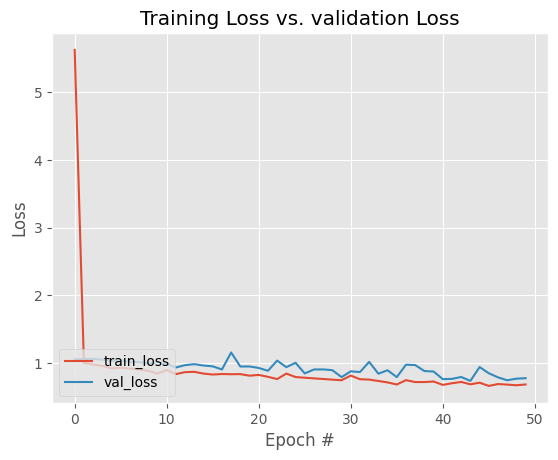

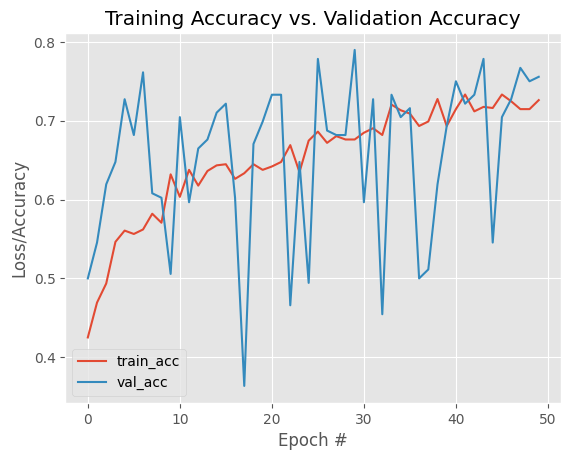

In [16]:
#!pip install scikit-plot
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import scikitplot as skplt
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn import metrics
import tensorflow

cnn_model = tensorflow.keras.models.load_model('best_model.h5')
# x_test = test_generator
# x_train = train_generator
# y_test = test_generator.classes

print("[INFO] evaluating network...")
predIdxs = cnn_model.predict(x_test)#, batch_size=BS)
predIdxs = np.argmax(predIdxs, axis=1)

trainpredIdxs = cnn_model.predict(x_train)#, batch_size=BS)
trainpredIdxs = np.argmax(trainpredIdxs, axis=1)

trainCNNScore=accuracy_score(trainpredIdxs,y_train.argmax(axis=1))*100
CNNScore=accuracy_score(predIdxs,y_test.argmax(axis=1))*100

print("\nTrainig Accuracy Score:-",trainCNNScore)
print("\nTesting Accuracy Score:-",CNNScore)
print("\nTraning Graph:- \n ")

# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), h.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), h.history["val_loss"], label="val_loss")
plt.title("Training Loss vs. validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left",)
plt.show()

plt.figure()
plt.plot(np.arange(0, N), h.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), h.history["val_accuracy"], label="val_acc")
plt.title("Training Accuracy vs. Validation Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left",)
plt.show()

In [18]:
extractCNN = Model(cnn_model.inputs, cnn_model.layers[-2].output)

#del(data)
#del(labels)
feat_trainCNN  = extractCNN.predict(x_train)
feat_testCNN = extractCNN.predict(x_test)

print(feat_trainCNN.shape)

7/7 [==============================] - 0s 25ms/step
(877, 1024)


In [19]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(feat_trainCNN,np.argmax(y_train,axis=1))

TrainSVMScoreCNN=svm.score(feat_trainCNN,np.argmax(y_train,axis=1))*100
print("SVM Training Accuracy Score:-",TrainSVMScoreCNN)

TestSVMScoreCNN=svm.score(feat_testCNN,np.argmax(y_test,axis=1))*100
print("\nSVM Testing Accuracy Score:-",TestSVMScoreCNN)

SVM Training Accuracy Score:- 99.65792474344356

SVM Testing Accuracy Score:- 97.27272727272728


In [20]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(feat_trainCNN,np.argmax(y_train,axis=1))

TrainDecisionScoreCNN=clf.score(feat_trainCNN,np.argmax(y_train,axis=1))*100
print("Decision Tree Training Accuracy Score:-",TrainDecisionScoreCNN)


TestDecisionScoreCNN=clf.score(feat_testCNN,np.argmax(y_test,axis=1))*100
print("\nDecision Tree Testing Accuracy Score:-",TestDecisionScoreCNN)

Decision Tree Training Accuracy Score:- 100.0

Decision Tree Testing Accuracy Score:- 84.54545454545455


In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(feat_trainCNN,np.argmax(y_train,axis=1))

TrainKNNScoreCNN=knn.score(feat_trainCNN,np.argmax(y_train,axis=1))*100
print("KNN Training Accuracy Score:-",TrainKNNScoreCNN)

TestKNNScoreCNN=knn.score(feat_testCNN,np.argmax(y_test,axis=1))*100
print("\nKNN Testing Accuracy Score:-",TestKNNScoreCNN)

KNN Training Accuracy Score:- 98.4036488027366

KNN Testing Accuracy Score:- 96.81818181818181


In [22]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(feat_trainCNN,np.argmax(y_train,axis=1))

TrainNBScoreCNN=gnb.score(feat_trainCNN,np.argmax(y_train,axis=1))*100
print("\nGaussianNaive Bayes Training Accuracy Score:-",TrainNBScoreCNN)

TestNBScoreCNN=gnb.score(feat_testCNN,np.argmax(y_test,axis=1))*100
print("\nGaussianNaive Bayes Testing Accuracy Score:-",TestNBScoreCNN)


GaussianNaive Bayes Training Accuracy Score:- 73.09007981755985

GaussianNaive Bayes Testing Accuracy Score:- 73.18181818181819
